In [1]:
from process_bigraph import Process, Composite
from biosimulators_processes import CORE  


fp = '/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'
fp2 = '/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/test_suite/examples/sbml-core/Beard2005_Mitochondrial_Respiration.xml'
fp3 = '/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/test_suite/examples/sbml-core/Mitchell2013/BIOMD0000000498_url.xml'


doc = {
        'ode': {
            '_type': 'process',
            'address': f'local:copasi',
            'config': {
                'model_file': fp3
            },
            'inputs': {
                'time': ['time_store'],
                'species_concentrations': ['species_concentrations_store']
            },
            'outputs': {
                'time': ['time_store'],
                'species_concentrations': ['species_concentrations_store'],
                'reaction_derivatives': ['reaction_fluxes_store']
            }
        },
        'fba': {
            '_type': 'process',
            'address': f'local:cobra',
            'config': {
                'model_file': fp3,
            },
            'inputs': {
                'reaction_fluxes': ['reaction_fluxes_store']
            },
            'outputs': {
                'fluxes': ['fluxes_store']
            }
        },
        'emitter': {
            '_type': 'step',
            'address': 'local:ram-emitter',
            'config': {
                'emit': {
                    'time': 'float',
                    'species_concentrations': 'tree[float]',
                    'reaction_fluxes': 'tree[float]',
                    'fluxes': 'tree[float]'
                }
            },
            'inputs': {
                'time': ['time_store'],
                'species_concentrations': ['species_concentrations_store'],
                'reaction_fluxes': ['reaction_fluxes_store'],
                'fluxes': ['fluxes_store']
            }
        }
    }

In [2]:
composition = Composite(config={'state': doc}, core=CORE)

No objective coefficients in model. Unclear what should be optimized


In [3]:
composition.run(5)
composition.gather_results()

{('emitter',): [{'time': 0.0,
   'species_concentrations': {'Hamp': 5e-09,
    'Fe-FT': 0.0,
    'FT': 0.0,
    'FT1': 0.0,
    'HO-1': 3.56e-11,
    'Heme': 1e-09,
    'LIP': 1.3e-06,
    'Fpn': 1e-09,
    'IRP': 1.16e-06,
    'Tf-Fe_intercell': 5e-06,
    'TfR': 4e-07,
    'Tf-Fe-TfR1': 0.0,
    'HFE': 2e-07,
    'HFE-TfR': 0.0,
    'Tf-Fe-TfR2': 0.0,
    '2(Tf-Fe)-TfR1': 0.0,
    '2HFE-TfR': 0.0,
    '2HFE-TfR2': 0.0,
    '2(Tf-Fe)-TfR2': 0.0,
    'TfR2': 0.0,
    'Heme_intercell': 1e-07},
   'reaction_fluxes': {'Fpn Export': 8.663778740419861e-10,
    'TfR1 expression': 3.2222222222222225e-12,
    'TfR1 degradation': 3.3479999999999995e-12,
    'Ferroportin Expression': 8.116883116883118e-10,
    'IRP expresion': 1.7391304347826085e-11,
    'IRP degradation': 1.85252e-11,
    'Fpn degradation': 1.1575e-13,
    'HFE degradation': 1.2835999999999999e-11,
    'HFE expression': 2.3469e-11,
    'TfR2 expression': 3e-11,
    'TfR2 degradation': 3.2000000000000006e-11,
    'Hepcidin expre

In [4]:
mod = composition.state['fba']['instance'].model

for r in mod.reactions:
    print(r.flux, r.x, r.y, r.upper_bound)

0.0 0.0 0.0 0.07251098689035607
0.0 0.0 0.0 0.18628339924034998
0.0 0.0 0.0 0.05494782316685709
0.0 0.0 -0.0 0.5324693877561701
0.0 0.0 0.0 0.5961131409260522
0.0 0.0 -0.0 0.479757490639832
0.0 0.0 -0.0 0.13614100020361353
0.0 0.0 0.0 0.09933675095517558
0.0 0.0 0.0 0.511705895485247
0.0 0.0 0.0 0.61870198279103
0.0 0.0 -0.0 0.5173665064156414
0.0 0.0 -0.0 0.872306783563969
0.0 0.0 0.0 0.7269190063415076
0.0 0.0 0.0 0.46070538736184286
0.0 0.0 0.0 0.4518369937029272
0.0 0.0 0.0 0.39872550388402495
0.0 0.0 0.0 0.2039051265749514
0.0 0.0 0.0 0.7619397475016025
0.0 0.0 0.0 0.40074400347534755
0.0 0.0 0.0 0.5538121520629805
0.0 0.0 0.0 0.8945818420484677
0.0 0.0 0.0 0.5072715969823782
0.0 0.0 0.0 0.4563933157135046
0.0 0.0 0.0 0.7273612314692179
0.0 0.0 0.0 0.11612950629978958
0.0 0.0 0.0 0.028781576636467077
0.0 0.0 0.0 0.17280702418810745
0.0 0.0 0.0 0.5629775801524621
0.0 0.0 0.0 0.6884425831435972
0.0 0.0 0.0 0.5656176684082715
0.0 0.0 0.0 0.2922162661192139
0.0 0.0 0.0 0.6713523199467

In [15]:

mod.solver.remove()


TypeError: Model.remove() missing 1 required positional argument: 'stuff'

In [20]:
mod.reactions.reaction_1

Reaction identifier,reaction_1
Name,Fpn Export
Memory address,0x3322bf070
Stoichiometry,2.0 species_2 <=> species_43 2.0 LIP <=> Tf-Fe_intercell
GPR,
Lower bound,-8.663778740419861e-10
Upper bound,1000.0


In [23]:
from cobra.io import read_sbml_model

model = read_sbml_model(fp3)

model.reactions[1].flux

No objective coefficients in model. Unclear what should be optimized


OptimizationError: Model is not optimized yet or solver context has been switched.

In [5]:
mod.objective = {
    mod.reactions.get_by_id('Reaction1'): 1.0
}

In [6]:
mod.objective.value


434147.26682129764

In [6]:
import numpy as np

def generate_sine_wave(frequency, duration, sample_rate=44100):
    """
    Generate a sine wave based on the given frequency and duration.

    Args:
    - frequency (float): The frequency of the note (in Hz).
    - duration (float): Duration of the wave (in seconds).
    - sample_rate (int): The sampling rate (default is 44100 Hz).

    Returns:
    - numpy.ndarray: The generated sine wave.
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    sine_wave = np.sin(2 * np.pi * frequency * t)
    return sine_wave


def apply_tremolo(wave, rate, depth, sample_rate=44100):
    """
    Apply a tremolo effect to the sine wave.

    Args:
    - wave (numpy.ndarray): The original sine wave.
    - rate (float): The frequency of the tremolo modulation (in Hz).
    - depth (float): The depth of the modulation (between 0 and 1).
    - sample_rate (int): The sampling rate (default is 44100 Hz).

    Returns:
    - numpy.ndarray: The sine wave with the tremolo effect applied.
    """
    t = np.linspace(0, len(wave) / sample_rate, len(wave), endpoint=False)
    modulation = 1 + depth * np.sin(2 * np.pi * rate * t)
    return wave * modulation


from scipy.signal import lfilter

def apply_phaser(wave, depth=0.5, rate=1.0, feedback=0.5, sample_rate=44100):
    """
    Apply a phaser effect to the sine wave.

    Args:
    - wave (numpy.ndarray): The original sine wave.
    - depth (float): The depth of the phaser modulation.
    - rate (float): The rate of the phaser sweep (in Hz).
    - feedback (float): The feedback coefficient.
    - sample_rate (int): The sampling rate (default is 44100 Hz).

    Returns:
    - numpy.ndarray: The sine wave with the phaser effect applied.
    """
    # Create LFO for phasing
    t = np.linspace(0, len(wave) / sample_rate, len(wave), endpoint=False)
    lfo = depth * np.sin(2 * np.pi * rate * t)

    # All-pass filter coefficients for phasing
    a1 = feedback
    phaser_wave = lfilter([1], [1, -a1], wave + lfo)
    
    return phaser_wave

def apply_flanger(wave, delay=0.002, depth=0.5, rate=0.25, sample_rate=44100):
    """
    Apply a flanger effect to the sine wave.

    Args:
    - wave (numpy.ndarray): The original sine wave.
    - delay (float): Base delay time in seconds.
    - depth (float): The depth of the flanger modulation.
    - rate (float): The rate of the flanger sweep (in Hz).
    - sample_rate (int): The sampling rate (default is 44100 Hz).

    Returns:
    - numpy.ndarray: The sine wave with the flanger effect applied.
    """
    t = np.linspace(0, len(wave) / sample_rate, len(wave), endpoint=False)
    lfo = depth * np.sin(2 * np.pi * rate * t)
    max_delay_samples = int(delay * sample_rate)
    
    flanger_wave = np.zeros_like(wave)
    
    for i in range(len(wave)):
        delay_samples = int((lfo[i] + delay) * sample_rate)
        if i - delay_samples >= 0:
            flanger_wave[i] = wave[i] + wave[i - delay_samples]

    return flanger_wave / (1 + depth)  # Normalize to avoid clipping


def apply_ring_modulation(wave, mod_freq, sample_rate=44100):
    """
    Apply a ring modulator effect to the sine wave.

    Args:
    - wave (numpy.ndarray): The original sine wave.
    - mod_freq (float): The modulation frequency (in Hz).
    - sample_rate (int): The sampling rate (default is 44100 Hz).

    Returns:
    - numpy.ndarray: The sine wave with the ring modulation applied.
    """
    t = np.linspace(0, len(wave) / sample_rate, len(wave), endpoint=False)
    mod_wave = np.sin(2 * np.pi * mod_freq * t)
    return wave * mod_wave


import matplotlib.pyplot as plt

def plot_wave(wave, sample_rate=44100, title="Waveform"):
    """
    Plot the waveform using matplotlib.

    Args:
    - wave (numpy.ndarray): The waveform to plot.
    - sample_rate (int): The sample rate (default is 44100 Hz).
    - title (str): Title for the plot.
    """
    duration = len(wave) / sample_rate
    t = np.linspace(0, duration, len(wave), endpoint=False)
    
    plt.figure(figsize=(10, 4))
    plt.plot(t, wave)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()
    
    
from scipy.io.wavfile import write
from IPython.display import Audio

def play_wave(wave, sample_rate=44100):
    """
    Play the waveform using IPython display Audio.

    Args:
    - wave (numpy.ndarray): The waveform to play.
    - sample_rate (int): The sample rate (default is 44100 Hz).

    Returns:
    - IPython.display.Audio: The audio object to play in the notebook.
    """
    # Normalize the wave to be in the range -1 to 1
    normalized_wave = np.int16(wave / np.max(np.abs(wave)) * 32767)
    
    # Save as a temporary file and play it
    return Audio(normalized_wave, rate=sample_rate)

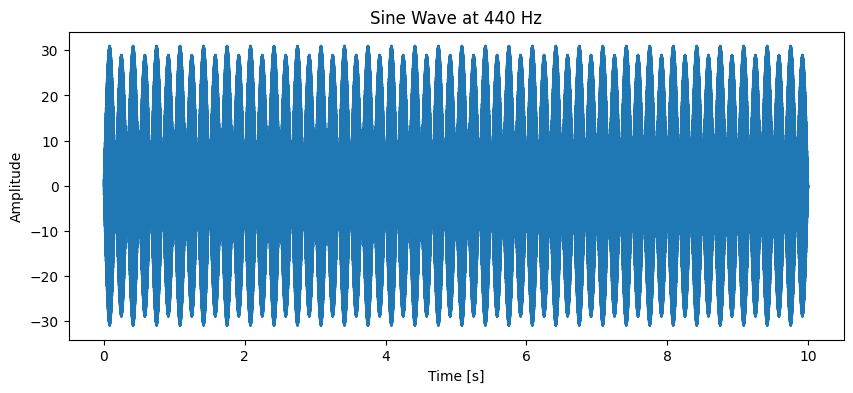

In [14]:
# Generate a 440 Hz sine wave (A4) for 2 seconds
frequency = 400
duration = 10.0
sine_wave = generate_sine_wave(frequency, duration)
sine_wave = apply_tremolo(sine_wave, 3, 30)

# Plot the sine wave
plot_wave(sine_wave, title="Sine Wave at 440 Hz")

# Play the sine wave
play_wave(sine_wave)